In [ ]:
from numpy import random, array

In [ ]:
#Fungsi createClusteredData untuk membuat dataset cluster
#antara pendapatan(income) dengan usia(age)

#Pemilihan centroid untuk pendapatan pada rentang 2000 s/d 20000
#Pemilihan centroid untuk usia pada rentang 20 s/d 70

def createClusteredData(N, k):
    random.seed(10)
    pointsPerCluster = float(N) / k
    X = []
    for i in range(k):
        incomeCentroid = random.uniform(2000.0, 20000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([random.normal(incomeCentroid, 1000.0),
            random.normal(ageCentroid, 2.0)])
    X = array(X)
    return X

Model 1 = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Model 2 = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2]
Model 2 = [4 1 4 4 4 4 1 4 1 4 1 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 5 5 0 0 5 0 5 0 0 0 0
 0 0 5 2 2 2 2 2 2 2 2 2 5 2 2 2 2 1 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 5 2 5 2 5 2 2 5 2 1 2 5 2 5 5 2 2 2 5 5]


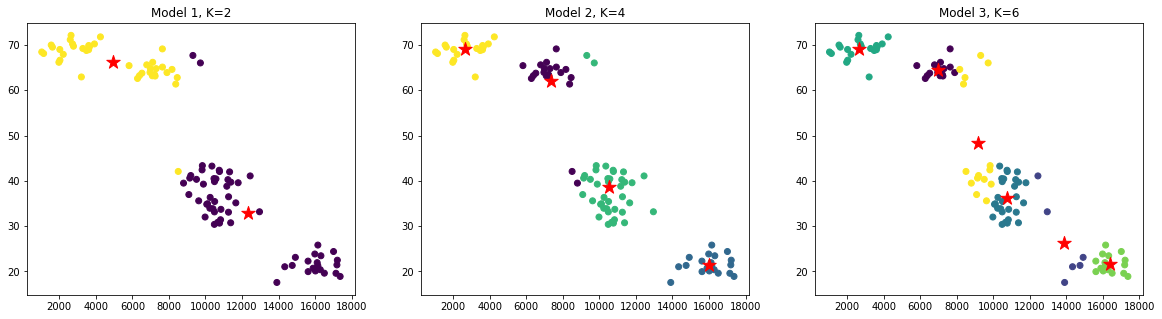

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float64

#Membuat dataset dengan 100 entry serta 5 cluster secara acak (memanggil fungsi createClusteredData)
data = createClusteredData(100, 5)

#Membuat model K-Means, dengan K = 2,4,6 sebagaimana data acak
k_nilai = [2,4,6]
model1 = KMeans(n_clusters = k_nilai[0])
model2 = KMeans(n_clusters=k_nilai[1])
model3 = KMeans(n_clusters=k_nilai[2])

#Data dinormalisasi untuk mendapatkan hasil yang baik
model1 = model1.fit(scale(data))
model2 = model2.fit(scale(data))
model3 = model3.fit(scale(data))

#Data tidak mengalami normalisasi
model1 = model1.fit(data)
model2 = model2.fit(data)
model3 = model3.fit(data)

#Kita dapat melihat cluster masing-masing data
print("Model 1 = " + str(model1.labels_))
print("Model 2 = " + str(model2.labels_))
print("Model 2 = " + str(model3.labels_))
 
# use titik centroid
centroid1 = model1.cluster_centers_
centroid2 = model2.cluster_centers_
centroid3 = model3.cluster_centers_

# use line centroid to x and y
line1 = [centroid1[0][0], centroid1[1][0]]
line2 = [centroid2[0][0], centroid2[1][0]]
line3 = [centroid3[0][0], centroid3[1][0]]

#Visualisasi data
plt.figure(figsize = (20, 5))
plt.subplot(1, 3, 1)
plt.title("Model 1, K=2")
plt.scatter(data[:, 0], data[:, 1], c=model1.labels_.astype(float))
plt.scatter(centroid1[:, 0], centroid1[:, 1], marker='*', s=200, c='r')
plt.subplot(1, 3, 2)
plt.title("Model 2, K=4")
plt.scatter(data[:, 0], data[:, 1], c=model2.labels_.astype(float))
plt.scatter(centroid2[:, 0], centroid2[:, 1], marker='*', s=200, c='r')
plt.subplot(1, 3, 3)
plt.title("Model 3, K=6")
plt.scatter(data[:, 0], data[:, 1], c=model3.labels_.astype(float))
plt.scatter(centroid3[:, 0], centroid3[:, 1], marker='*', s=200, c='r')
plt.show()

